In [1]:
import sys        
sys.path.append('/home/huyentn2/project/nano_count/segmentation_unet/')
import os
from dataset import *
from utils import *
import torch.nn.functional  as F
import numpy as np
import torch
from torch.utils.data import DataLoader, random_split
from scipy.ndimage import label
from utils import get_num_NP
import matplotlib.pyplot as plt
import json


/home/huyentn2/.conda/envs/nano/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = UNet(n_channels=1, n_classes= 2, bilinear= False)
model = model.to(memory_format=torch.channels_last)
model = torch.nn.DataParallel(model).cuda()

checkpoint = torch.load("/home/huyentn2/project/nano_count/segmentation_unet/checkpoints_7_4/fold0/checkpoint_epoch15.pth")

model.load_state_dict(checkpoint)
model.to(device=device)

input_dir = "/home/huyentn2/project/nano_count/segmentation_unet/data/img_patch/"
save_dir = "/home/huyentn2/project/nano_count/segmentation_unet"

out_files = "/home/huyentn2/project/nano_count/segmentation_unet/checkpoints_7_4/save_result/binary_pred/fold0/"
files = os.listdir(out_files)


In [34]:
js  = '/home/huyentn2/project/nano_count/segmentation_unet/inference/gt_all_count.json'

with open(js, 'r') as fp:
    gt_count = json.load(fp)

In [35]:
count_GT = []

for id in range(len(files)):
    input_file = input_dir + files[id]

    if files[id] in list(gt_count.keys()):
        count_GT.append(gt_count[files[id]])

In [45]:
min_dist = 10
max_fil_thr = 120
bin_thr_range = np.arange(.5,.7,.05)
range_rad = (10,200)
type_count = "3" # 4

def plot():
    count_3 = np.zeros((len(files)))

    for id in range(len(files)):
        input_file = input_dir + files[id]
        mask_pred = eval_single_count(input_file,
                    save_dir,
                    model,
                    device,
                    img_scale=1.0,)
        mask_pred_1 = F.sigmoid(mask_pred).squeeze()[1,:].float()
        
        count_3[id] = mask_pred_1.sum().item()
        # count_list = []


    count_3.shape

    fig = plt.figure()
    ax = plt.axes()
    x = np.linspace(0, len(count_GT)-1, len(count_GT))

    count_ =  (count_GT - np.min(count_GT)) / (np.max(count_GT) - np.min(count_GT))
    ax.plot(x, count_, 'r')
    count_es =  (count_3 - np.min(count_3)) / (np.max(count_3) - np.min(count_3))
    ax.plot(x, count_es, 'b')
    
    return count_3

    

/home/huyentn2/.conda/envs/nano/lib/python3.10/site-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


array([ 5623.97460938, 29723.59960938, 29109.97460938,  7883.55859375,
        9559.17578125,  7037.07177734, 15830.61132812, 10334.57519531,
       31928.29101562, 11365.06152344,  8726.19335938,  9660.75390625,
       10347.9453125 , 29118.07226562,  9606.57324219, 11998.890625  ,
       12332.22851562,  7862.45800781,  6259.65869141, 11098.17773438,
        9463.86523438,  8390.23046875,  9192.68457031,  5119.38818359,
        7983.83496094,  6884.47949219, 12265.4453125 ,  9202.05371094,
       30984.64453125, 29736.81640625, 29605.34375   ,  8169.41748047,
       28750.61328125,  8579.85644531,  8024.19238281])

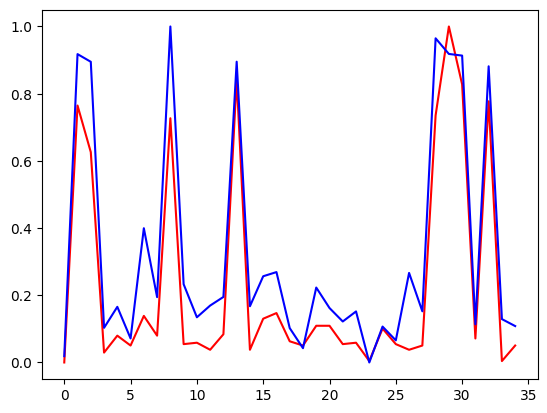

: 

In [46]:
plot()

GET DENSITY FROM GRAY-SCALE MAPPING OF A SINGLE IMAGE

tensor(14488.2471)


/home/huyentn2/.conda/envs/nano/lib/python3.10/site-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


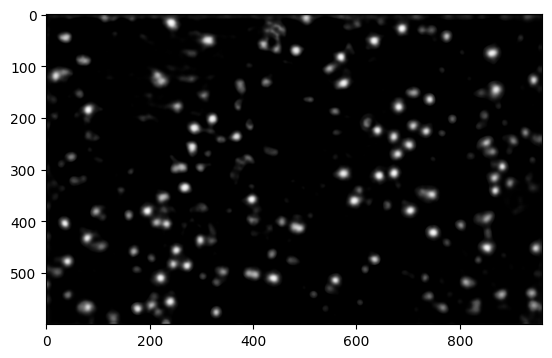

In [23]:
input_file = "/home/huyentn2/project/nano_count/segmentation_unet/data/img_patch/Tianle1ng_3.png"

mask_pred = eval_single_count(input_file,
            save_dir,
            model,
            device,
            img_scale=1.0,)

mask_pred_1 = F.sigmoid(mask_pred).squeeze()[1,:].float()
plt.imshow(mask_pred_1, cmap = 'gray')

print(mask_pred_1.sum())

tensor(5988.5483)


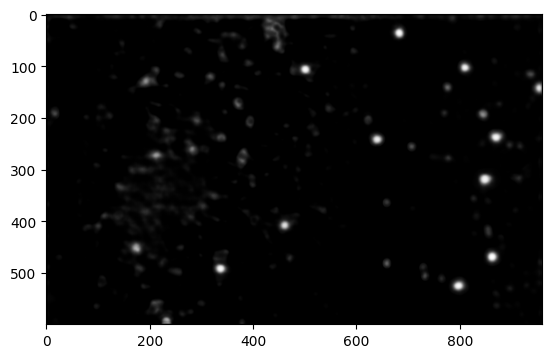

In [24]:
input_file = "/home/huyentn2/project/nano_count/segmentation_unet/data/img_patch/Tianle10min-0am375-aqu-DSC_3.png"

mask_pred = eval_single_count(input_file,
            save_dir,
            model,
            device,
            img_scale=1.0,)

mask_pred_1 = F.sigmoid(mask_pred).squeeze()[1,:].float()
plt.imshow(mask_pred_1, cmap = 'gray')

print(mask_pred_1.sum())